# **Riview Study**

## Objectives
* Load reviews data
* Explore the data and find key word for the survey
* Set up and save the questions

## Inputs
* General Dataset: outputs/datasets/collection/BreakfastReviews.csv
* Python Set: input/datasets/python_sets/stopwords.py
* Python Set: input/datasets/python_sets.py/uninportant_words.py

## Outputs
* Generate Dataset: outputs/datasets/survey_questions/survey_questions.csv

---

## Change working directory
We need to change the working directory from its current folder to its parent folder
* We access the current directory with os.getcwd()

In [3]:
import os
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast/jupyter_notebooks'

We want to make the parent of the current directory the new current directory.
* os.path.dirname() gets the parent directory
* os.chir() defines the new current directory

In [4]:
os.chdir(os.path.dirname(current_dir))
print("You set a new current directory")

You set a new current directory


Confirm the new current directory

In [5]:
current_dir = os.getcwd()
current_dir

'/workspaces/Guest-Survey-Analysis-to-Improve-Hotel-Breakfast'

---

## Load Data

In [6]:
import pandas as pd
df = pd.read_csv("outputs/datasets/collection/BreakfastReviews.csv")
df.head(3)

,Rating,Breakfast,Reviews
0,5,0,Absolutely fantastic stay! The apartment was s...
1,5,0,One of the best apartment hotels I’ve stayed i...
2,5,1,A wonderful experience from start to finish. C...


## Data Exploration
Check variable type and distribution, missing levels

In [ ]:
from ydata_profiling import ProfileReport
pandas_report = ProfileReport(df=df, minimal=True)
pandas_report.to_notebook_iframe()

## Find relevant words

Filter rows, where the guest had breakfast

In [8]:
df_breakfast = df[df["Breakfast"]==True]
df_breakfast["Breakfast"].unique()


array([1])

---

Create a cleaning def

In [ ]:
from inputs.datasets.python_sets.stopwords import ENGLISH_STOP_WORDS as stopwords
from inputs.datasets.python_sets.unimportant_words import unimportant_words as unimportant

def clean_text(text):
    """
    Reduce text to find important keywords
    
    Take a string
    Remove numbers, signs, stopword,
    and the given words
    Return cleaned string
    """
    def delet_words(ser, dropwords):
        for word in ser:
            if word in dropwords:
               ser = ser[ser != word]
        return ser
	
    text = text.lower()
    
    ser = pd.Series(text.split())
    
    replace_chars = [
        "0","1","2","3","4",
        "5","6","7","8","9",
        "?", ".", "!", "?", ","
    ]
    
    for replace_char in replace_chars:
        ser = ser.str.replace(replace_char,"")    	
    
    ser = delet_words(ser, stopwords)
    ser = delet_words(ser, unimportant)

    return ser

Clean the reviews and concatenate them in one string

In [33]:
str_breakfast_reviews = ""
for index, row in df_breakfast.iterrows():
    str_breakfast_reviews += df_breakfast.at[index, "Reviews"]

str_breakfast_reviews

'A wonderful experience from start to finish. Check-in was seamless, and the apartment was modern and well-maintained. We also tried the breakfast, and it was delicious with plenty of variety.Amazing location, modern decor, and great service! Everything was spotless, and the bed was one of the most comfortable I’ve ever slept in. Highly recommend this place!Absolutely loved our stay here! The apartment was spacious, well-lit, and had a beautiful balcony. The breakfast was fresh and tasty, and the staff was always happy to help.Everything about this place was perfect—the friendly service, clean and spacious apartments, and the central yet peaceful location. Would give it more than 5 stars if I could!We had an incredible time here! The apartment was large, tastefully decorated, and had all the comforts of home. The breakfast was well worth it, with fresh pastries and great coffee.Excellent apartment hotel with top-notch facilities. The breakfast was fantastic, with a wide range of fresh 

List the most frequent words and add the not relevant words to unimportant_words.py manually

In [11]:
ser_breakfast_reviews = clean_text(str_breakfast_reviews)

ser_breakfast_reviews.value_counts().head(20)

fresh          16
staff          16
clean          13
options        11
spacious       10
good           10
modern          9
experience      7
service         7
variety         7
worth           7
check-in        6
delicious       6
kitchen         6
friendly        6
place           5
okay            5
nice            5
beautifully     5
fantastic       5
Name: count, dtype: int64

Repeat the last 3 step till we get usefull words

---

From this list we create groups.

- fresh, spacious, delicious
- staff, friendly
- clean, modern, beautifully 
- options
- service
- varety
- worth

## Create groups and questions

Create world cloud

In [32]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

def plot_wordcloud(wordcloud):
    plt.figure(figsize=(15, 10))
    plt.axis("off")
    plt.imshow(wordcloud) 
    plt.show()

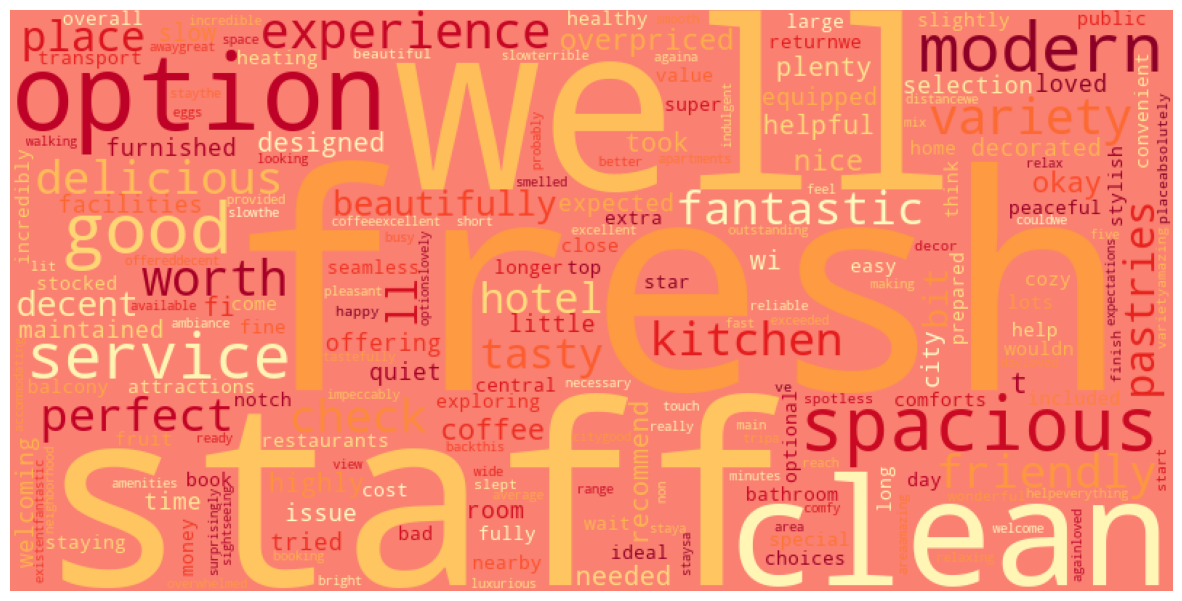

In [31]:
wordcloud = WordCloud(width = 800, height = 400, 
                      background_color='salmon', colormap='YlOrRd',
                      collocations = False).generate(ser_breakfast_reviews.to_string())

plot_wordcloud(wordcloud)

We adding pair words to the list from the worldcolud and set up categories
- **Taste:** fresh, spacious, delicious
- **Staff:** staff, friendly
- **Appearance:** clean, modern, beautifully 
- **Varety:** options, varety, `selection`
- **Service:** service, `fast`
- **Price:** worth, `money`, `cost`


Finally we set up our questions and save it to a csv file
- Have you tried our breakfast? (Yes and I would again./ Yes but I would skip it next time./ No.)
- How is it taste? / How is it looks (if haven't tried)? (1-7)
- How kind, helpful our the service, staff? (1-7)
- How do you rate the appearance of our restaurant? (1-7)
- How satisfied are you with the breakfast options? (1-7)
- How satisfied are you with the speed and the quality of our service? (1-7/ NaN)
- How do you find our price for the breakfast? (1-7)
  
The categories staff and appearance can easily not related with the breakfast,
but our team finds a good idea to ask them as well

## Output our findings

In [29]:
df_questions = pd.DataFrame({
    "questions":["Have you tried our breakfast?",
                 "How is it taste?",
                 "How kind and helpful our the service and stuff?",
                 "How do you rate the appearance of our restaurant?",
                 "How satisfied are you with the breakfast options?",
                 "How satisfied are you with the speed and the quality of our service?",
                 "How do you find our price for the breakfast?"
                ],
    "answer":["Yes again/ Yes next time not/ No",
              "1-7",
              "1-7",
              "1-7",
              "1-7",
              "1-7/ None",
              "1-7",
              ],
    "categories":["Breakfast","Taste","Staff","Appearance","Varety","Service","Price"]
})

In [30]:
import os
try:
  os.makedirs(name='outputs/datasets/survey_questions')
except Exception as e:
  print(e)

df_questions.to_csv("outputs/datasets/survey_questions/survey_questions.csv", index=False)

[Errno 17] File exists: 'outputs/datasets/survey_questions'
